In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)


In [102]:
df= pd.read_csv('CVD_cleaned.csv')

In [103]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


# Correlation Checking

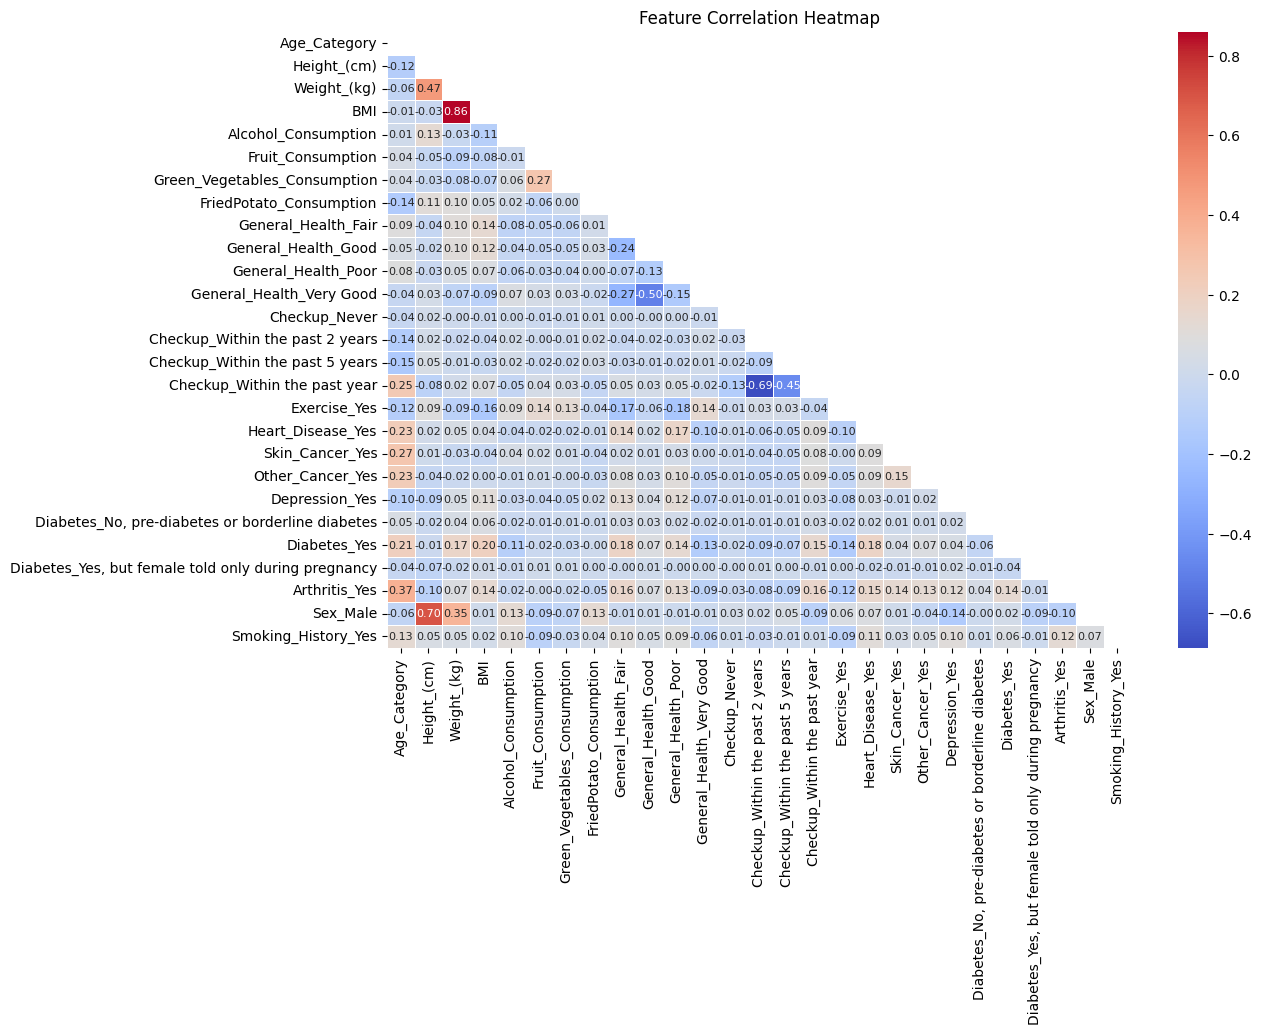

Top correlated features with Heart Disease:
Heart_Disease_Yes                                      1.000000
Age_Category                                           0.229011
Diabetes_Yes                                           0.181072
General_Health_Poor                                    0.169691
Arthritis_Yes                                          0.153913
General_Health_Fair                                    0.144449
Smoking_History_Yes                                    0.107797
General_Health_Very Good                               0.101697
Exercise_Yes                                           0.096347
Checkup_Within the past year                           0.093346
Other_Cancer_Yes                                       0.092387
Skin_Cancer_Yes                                        0.090848
Sex_Male                                               0.072595
Checkup_Within the past 2 years                        0.056322
Checkup_Within the past 5 years                        0.048

In [47]:
df_encoded = df.copy()
categorical_cols = ["General_Health", "Checkup", "Exercise", "Heart_Disease", "Skin_Cancer", 
                    "Other_Cancer", "Depression", "Diabetes", "Arthritis", "Sex", "Smoking_History"]
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

# Convert Age_Category to numeric values (assuming age ranges)
age_mapping = {"18-24": 1, "25-29": 2, "30-34": 3, "35-39": 4, "40-44": 5,
               "45-49": 6, "50-54": 7, "55-59": 8, "60-64": 9, "65-69": 10, "70-74": 11, "75-79": 12, "80+": 13}
df_encoded["Age_Category"] = df_encoded["Age_Category"].map(age_mapping)

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Mask upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 8})
plt.title("Feature Correlation Heatmap")
plt.show()

# Display top correlated features
correlation_target = abs(corr_matrix["Heart_Disease_Yes"]).sort_values(ascending=False)
print("Top correlated features with Heart Disease:")
print(correlation_target)


# Data Preprocessing

In [106]:
df2 = df.drop(['Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption','Checkup','Height_(cm)','Weight_(kg)','General_Health'], axis=1)

df2["Age_Category"] = df2["Age_Category"].map(age_mapping)

df2= pd.get_dummies(df2, columns=['Diabetes'],drop_first=True,dtype=np.int8)


yes_no_columns = ["Exercise", "Heart_Disease", "Skin_Cancer", "Other_Cancer", 
                  "Depression", "Arthritis", "Smoking_History"]

# general_health_order = {"Excellent": 5, "Very Good": 4, "Good": 3, "Fair": 2, "Poor": 1}
# df2["General_Health"] = df2["General_Health"].map(general_health_order)

# checkup_order = {
#     "Within the past year": 5,
#     "Within the past 2 years": 4,
#     "Within the past 5 years": 3,
#     "5 or more years ago": 2,
#     "Never": 1
# }
# df2["Checkup"] = df2["Checkup"].map(checkup_order)

df2[yes_no_columns] = df2[yes_no_columns].replace({"Yes": 1, "No": 0})
df2["Sex"] = df2["Sex"].map({"Male": 1, "Female": 0})

df2.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14932\727834504.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[yes_no_columns] = df2[yes_no_columns].replace({"Yes": 1, "No": 0})


,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy"
0,0,0,0,0,0,1,0,11,14.54,1,0.0,0,0,0
1,0,1,0,0,0,0,0,11,28.29,0,0.0,0,1,0
2,1,0,0,0,0,0,0,9,33.47,0,4.0,0,1,0
3,1,1,0,0,0,0,1,12,28.73,0,0.0,0,1,0
4,0,0,0,0,0,0,1,13,24.37,1,0.0,0,0,0


# Neural Networks

In [107]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert DataFrame to NumPy
X = df2.drop(columns=["Heart_Disease"]).values  # Features
y = df2["Heart_Disease"].values  # Target variable

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features (Neural Networks work best with normalized inputs)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape for single output
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [133]:
# Ensure y_train and y_test are NumPy arrays before counting
train_counts = pd.Series(y_train).value_counts()
test_counts = pd.Series(y_test).value_counts()

# Display counts
print("Training Set Distribution:")
print(train_counts)
print("\nTesting Set Distribution:")
print(test_counts)


Training Set Distribution:
Heart_Disease
0    227109
1     19974
Name: count, dtype: int64

Testing Set Distribution:
Heart_Disease
0    56774
1     4997
Name: count, dtype: int64


In [108]:
class HeartDiseaseNN(nn.Module):
    def __init__(self, input_dim):
        super(HeartDiseaseNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer
        self.bn1 = nn.BatchNorm1d(128)  # Batch Normalization
        self.fc2 = nn.Linear(128, 64)  # Second hidden layer
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)  # Third hidden layer
        self.bn3 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, 1)  # Output layer
        self.dropout = nn.Dropout(0.3)  # Dropout for regularization
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  # Sigmoid for binary classification

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.sigmoid(self.fc4(x))  # Sigmoid activation at output
        return x

# Initialize Model
input_dim = X_train.shape[1]
model = HeartDiseaseNN(input_dim)

In [113]:
# Loss Function and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Move data to device
X_train_tensor, y_train_tensor = X_train_tensor.to(device), y_train_tensor.to(device)
X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)

# Training Loop
num_epochs = 100
batch_size = 32

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Clear previous gradients
    outputs = model(X_train_tensor)  # Forward pass
    loss = criterion(outputs, y_train_tensor)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Calculate Training Accuracy
    y_train_pred = (outputs > 0.5).float()
    train_accuracy = (y_train_pred.eq(y_train_tensor).sum().item()) / y_train_tensor.shape[0]

    # Evaluate on Test Set
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        y_test_pred = model(X_test_tensor)
        y_test_pred_class = (y_test_pred > 0.5).float()
        test_accuracy = (y_test_pred_class.eq(y_test_tensor).sum().item()) / y_test_tensor.shape[0]

    # Print Training Loss, Training Accuracy, and Testing Accuracy
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {loss.item():.4f} | Train Acc: {train_accuracy:.4f} | Test Acc: {test_accuracy:.4f}")


Epoch [10/100] - Loss: 0.6487 | Train Acc: 0.6499 | Test Acc: 0.2739
Epoch [20/100] - Loss: 0.5588 | Train Acc: 0.7920 | Test Acc: 0.7306
Epoch [30/100] - Loss: 0.4949 | Train Acc: 0.8546 | Test Acc: 0.8056
Epoch [40/100] - Loss: 0.4506 | Train Acc: 0.8796 | Test Acc: 0.8449
Epoch [50/100] - Loss: 0.4160 | Train Acc: 0.8957 | Test Acc: 0.8748
Epoch [60/100] - Loss: 0.3882 | Train Acc: 0.9043 | Test Acc: 0.8942
Epoch [70/100] - Loss: 0.3649 | Train Acc: 0.9103 | Test Acc: 0.9070
Epoch [80/100] - Loss: 0.3452 | Train Acc: 0.9136 | Test Acc: 0.9175
Epoch [90/100] - Loss: 0.3286 | Train Acc: 0.9150 | Test Acc: 0.9186
Epoch [100/100] - Loss: 0.3141 | Train Acc: 0.9162 | Test Acc: 0.9188


In [129]:
model.eval()

# Get predicted probabilities (sigmoid outputs)
with torch.no_grad():
    y_test_pred_prob = model(X_test_tensor).cpu().numpy().flatten()  # Convert to NumPy and flatten

# Convert actual y_test tensor to NumPy
y_test_actual = y_test_tensor.cpu().numpy().flatten()  # Ensure it's a NumPy array

# Convert to a DataFrame
df_test_results = pd.DataFrame(X_test, columns=X.columns)  # Create DataFrame from X_test features
df_test_results["Heart_Disease_Actual"] = y_test_actual  # Add actual labels
df_test_results["Heart_Disease_Risk"] = y_test_pred_prob
df_test_results.head(25)

,Exercise,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Heart_Disease_Actual,Heart_Disease_Risk
302051,1,0,0,0,1,1,9,27.26,0,12.0,0,0,0,0.0,0.186845
59950,0,0,0,0,1,0,11,29.12,0,0.0,0,0,0,0.0,0.210627
203639,0,0,0,0,1,0,9,25.82,1,6.0,0,0,0,0.0,0.255185
78768,1,0,0,0,0,1,2,28.07,1,0.0,0,0,0,0.0,0.132896
216156,1,1,0,1,1,0,8,21.26,1,0.0,1,0,0,0.0,0.310835
84107,1,0,1,1,0,0,9,27.46,0,0.0,0,0,0,0.0,0.179789
284341,1,1,0,0,0,1,8,28.70,1,0.0,0,0,0,0.0,0.221841
227575,1,0,0,1,1,0,10,24.39,1,0.0,0,0,0,0.0,0.251007
19010,1,0,0,0,0,0,11,22.67,0,30.0,0,0,0,0.0,0.143031
123471,1,0,0,0,0,0,8,47.78,0,2.0,0,1,0,0.0,0.198334


In [125]:
torch.save(model.state_dict(), "heart_disease_model.pth")

In [131]:
# New patients (multiple rows)
new_patients = np.array([
    [1,0,0,0,0,1,2,30,0,5,0,0,0],
   [0,0,0,0,0,1,2,30,0,5,0,0,0],
])

# Standardize using the same scaler
new_patients_scaled = scaler.transform(new_patients)

# Convert to PyTorch tensor
new_patients_tensor = torch.tensor(new_patients_scaled, dtype=torch.float32).to(device)

# Get predictions
with torch.no_grad():
    risk_scores = model(new_patients_tensor).cpu().numpy().flatten()  # Convert tensor to NumPy

# Convert probabilities to binary predictions
predictions = (risk_scores > 0.5).astype(int)

# Create results DataFrame
df_results = pd.DataFrame(new_patients, columns=X.columns)
df_results["Heart_Disease_Risk"] = risk_scores
df_results["Heart_Disease_Prediction"] = predictions
df_results


c:\Users\ASUS\Workspace\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Exercise,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Heart_Disease_Risk,Heart_Disease_Prediction
0,1,0,0,0,0,1,2,30,0,5,0,0,0,0.120930,0
1,0,0,0,0,0,1,2,30,0,5,0,0,0,0.141624,0


# Logistic Regression

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assuming df2 is already loaded
X = df2.drop(columns=["Heart_Disease"])  # Features
y = df2["Heart_Disease"]  # Target variable

# Split into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
# Train logistic regression model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Display detailed performance
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9190
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.48      0.03      0.05      4997

    accuracy                           0.92     61771
   macro avg       0.70      0.51      0.50     61771
weighted avg       0.89      0.92      0.88     61771



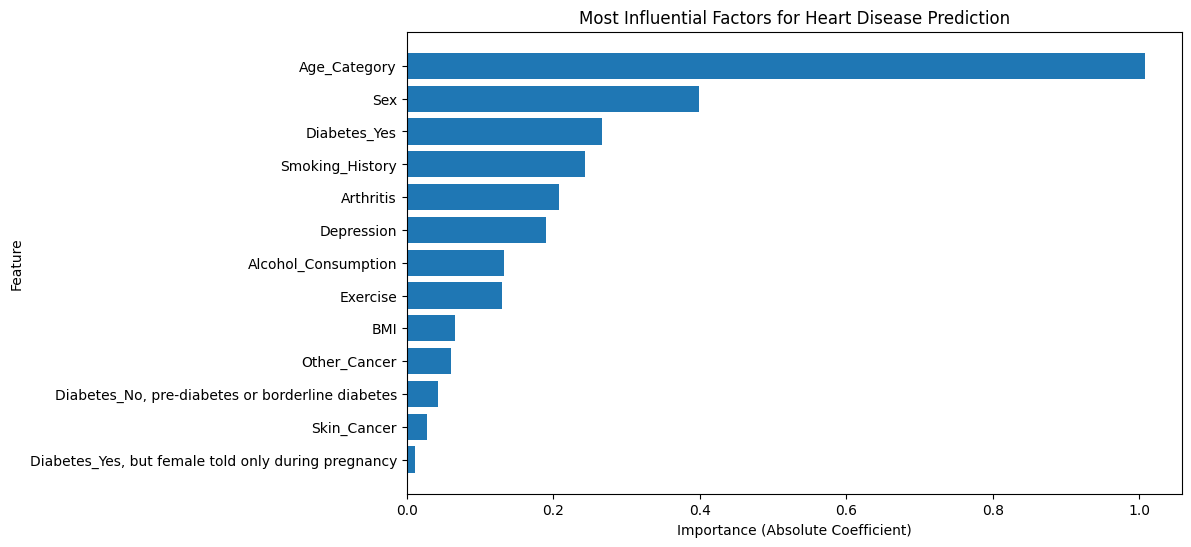

In [111]:
# Get feature importance (absolute coefficients)
feature_importance = np.abs(log_reg.coef_[0])

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Importance (Absolute Coefficient)")
plt.ylabel("Feature")
plt.title("Most Influential Factors for Heart Disease Prediction")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [112]:
coefficients = log_reg.coef_[0]  # Extract coefficients from the model

# Create a DataFrame for better interpretation
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Coefficient": coefficients})
feature_importance_df["Abs_Coefficient"] = np.abs(feature_importance_df["Coefficient"])  # Absolute value for sorting

# Sort features by importance (absolute magnitude)
feature_importance_df = feature_importance_df.sort_values(by="Abs_Coefficient", ascending=False)
feature_importance_df["Odds Ratio"] = np.exp(feature_importance_df["Coefficient"])
feature_importance_df

,Feature,Coefficient,Abs_Coefficient,Odds Ratio
6,Age_Category,1.007633,1.007633,2.739111
5,Sex,0.398849,0.398849,1.490109
11,Diabetes_Yes,0.266054,0.266054,1.304805
8,Smoking_History,0.243855,0.243855,1.276160
4,Arthritis,0.207736,0.207736,1.230888
3,Depression,0.189577,0.189577,1.208739
9,Alcohol_Consumption,-0.132921,0.132921,0.875534
0,Exercise,-0.129726,0.129726,0.878336
7,BMI,0.066094,0.066094,1.068327
2,Other_Cancer,0.059975,0.059975,1.061810


# Random Forrest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8931
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     56774
           1       0.23      0.14      0.17      4997

    accuracy                           0.89     61771
   macro avg       0.58      0.55      0.56     61771
weighted avg       0.87      0.89      0.88     61771



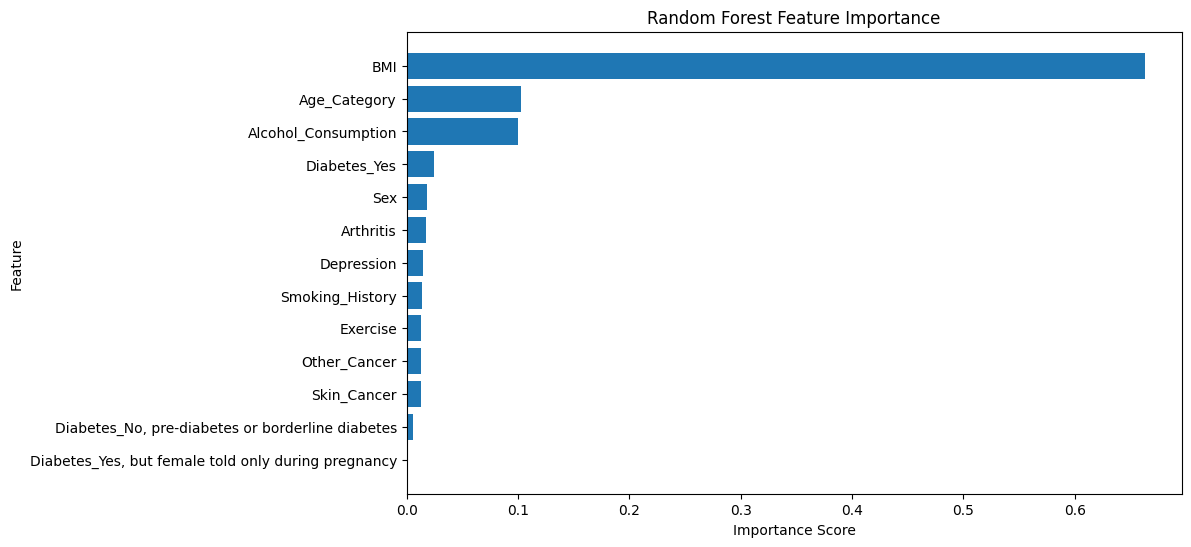

In [119]:
feature_importance = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()